<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_13_02_%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

### 1. 모분산을 알고 있는 경우 모평균의 가설 검정 : Z-검정(단일표본)

* scipy 패키지의 확률분포 클래스 stats.norm() 사용
* 사례: 사람의 평균 수명을 알아보기 위해 사망자 100명을 표본으로 추출하여 조사하였더니 평균 71.789년으로 나타났다. 모표분편차를 8.9년으로 가정할때, 현재의 평균 수명은 70년보다 길다고 할 수 있는가를 검정하여라(유의수준 0.05%)

#### 1-1 가설 설정

* H0: mu = 70
* H1: mu > 70
* 유의수준 0.05

#### 1-2 기각역

In [ ]:
z_95 = stats.norm.ppf(0.95)
print(z_95)

1.6448536269514722


#### 1-3 검정통계량(z통계량)

In [ ]:
# 변이 분석

n = 100
m_u = 70
m_sigma = 8.9
hyp_u = 71.798

# 검정통계량 계산

z = (hyp_u - m_u) / (m_sigma / np.sqrt(n))
print('검정통게량: ', round(z, 3))

# 유의확률

print("유의확률 : ", round(2 * stats.norm().sf(np.abs(z)),3))

검정통게량:  2.02
유의확률 :  0.043


#### 1-4 분포도 작성 및 통계적 결론
* 1.64 < 2.02, z통계량은 기각역에 속함

Font 'default' does not have a glyph for '\ud1b5' [U+d1b5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uacc4' [U+acc4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub7c9' [U+b7c9], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud1b5' [U+d1b5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uacc4' [U+acc4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub7c9' [U+b7c9], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc740' [U+c740], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uae30' [U+ae30], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac01' [U+ac01], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc5ed' [U+c5ed], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc5d0' [U+c5d0], 

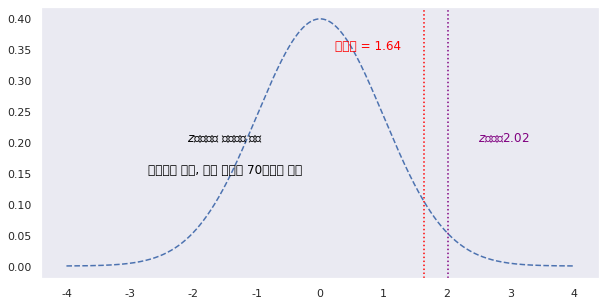

In [ ]:
## 시각화

xx = np.linspace(-4, 4, 1000)
black = {'facecolor' : 'black'}
plt.figure(figsize = (10, 5))

pdf_norm = stats.norm.pdf(xx)

plt.plot(xx, pdf_norm, 'b--')

# 95% 임계값 표시

plt.axvline(x = z_95, color = 'red', linestyle = ":")
plt.text(0.75, 0.35, '임계값 = ' + str(round(z_95, 2)),
         horizontalalignment = 'center', color = 'red')

# 위에서 구한 z통계량
plt.axvline(x = z, color = 'purple', linestyle = ":")
plt.text(2.9, 0.2, '$z$통계량' + str(round(z, 2)),
            horizontalalignment = 'center', color = 'purple') 
plt.text(-1.5, 0.2, '$z$통계량은 기각역에 속함' ,
            horizontalalignment = 'center', color = 'black') 
plt.text(-1.5, 0.15, '귀무가설 기각, 평균 수명은 70년보다 길다' ,
            horizontalalignment = 'center', color = 'black') 
plt.grid()
plt.show()

### 2. 모분산을 모르고 n < 30 경우 모평균의 가설검정(t검정)

* scipy 패키지의 확률분포 클래스 stats.t() 사용
* 사례: A편의점의 매운 라면의 연평균판매량이 46개였다고 한다. 12곳의 매장을 표본추출출하여 매운 라면 판매량을 조사하였더니 표본평균이 42, 표본표준편차가 11.9로 나타났다. 라면 판매량의 모집단은 정규모집단으로 가정하였을때 연평균판매량이 46개보다 적은지 검정하라(유의수준 0.05%)

#### 2-1 가설설정

* H0: mu = 46
* H1: mu < 46
* 유의수준 0.05

#### 2-2 기각역

In [ ]:
# 변이분석

n = 12
s_mu = 42
s_sigma = 11.9
hyp_mu = 46

# 95% 좌측검정 기각역 , df:자유도

t_95 = -1 * stats.t.ppf(0.95, df = n-1) # 좌측검정 * -1

print(t_95)

-1.7958848187036691


#### 2-3 검정통계량(t-통계량)

In [ ]:
# 통계값 t값 계산

t_value = (s_mu - hyp_mu) / (s_sigma / np.sqrt(n))
print(t_value)

-1.1644039042479846


Font 'default' does not have a glyph for '\ud1b5' [U+d1b5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uacc4' [U+acc4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub7c9' [U+b7c9], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc784' [U+c784], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uacc4' [U+acc4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac12' [U+ac12], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud1b5' [U+d1b5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub7c9' [U+b7c9], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc740' [U+c740], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uae30' [U+ae30], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uac01' [U+ac01], 

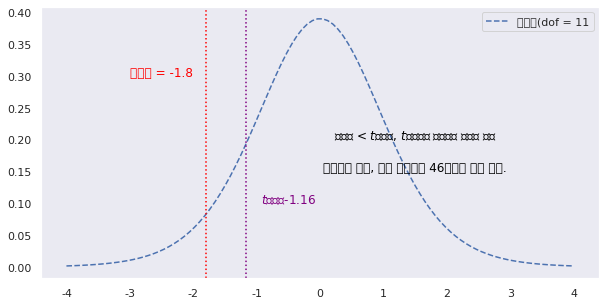

In [ ]:
### 시각화

t_data = np.linspace(-4, 4, 100)
t_dist = stats.t(df = n-1)

black = {"facecolor" : 'black'}
plt.figure(figsize = (10,5))

t_dist = stats.t(df = n-1)
plt.plot(t_data, t_dist.pdf(t_data), "b--", label = ('자유도(dof = %d') % 11)

# 95% 임계값 표시

plt.axvline(x = t_95, color = 'red', linestyle = ":")
plt.text(-2.5, 0.3, '임계값 = ' + str(round(t_95, 2)),
         horizontalalignment = 'center', color = 'red')

# 위에서 구한 z통계량
plt.axvline(x = t_value, color = 'purple', linestyle = ":")
plt.text(-0.5, 0.1, '$t$통계량' + str(round(t_value, 2)),
            horizontalalignment = 'center', color = 'purple') 
plt.text(1.5, 0.2, '임계값 < $t$통계량, $t$통계량은 기각역에 속하지 않음' ,
            horizontalalignment = 'center', color = 'black') 
plt.text(1.5, 0.15, '귀무가설 채택, 라면 판매량은 46개보다 적지 않다.' ,
            horizontalalignment = 'center', color = 'black') 
plt.grid()
plt.legend()
plt.show()

### 3. p-value

* 유의확률 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리 부분에 해당하는 영역의 면적
* 귀무가설이 맞음에도 불구하고 현재 검정통계량 값과 같은 혹은 대립가설을 더 옹호하는 검정통계량 값이 나올 확률

#### 3-1 모분산을 모르고 n < 30 경우 모평균의 가설검정의 사례 정리

* 통계량 t = -1.1644...
* 95% 좌측검정 기각역: -1.7959...
* 자유도 df: 12-1

In [ ]:
# 변이분석

n = 12
s_mu = 42
s_sigma = 11.9
hyp_mu = 46

# 95% 좌측검정 기각역, df:자유도

t_95 = round(-1 * stats.t.ppf(0.95, df = n-1), 3) # 좌측검정 * -1

print('기각역 : ', t_95)

# t-통계량 계산

t_value = (s_mu - hyp_mu) / (s_sigma / np.sqrt(n))
print("t-통계량 : ", t_value)

# p-value 계산

print("p-value : ", round(stats.t(df = n-1).cdf(t_value), 3))

기각역 :  -1.796
t-통계량 :  -1.1644039042479846
p-value :  0.134


Font 'default' does not have a glyph for '\uac12' [U+ac12], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc774' [U+c774], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc720' [U+c720], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc758' [U+c758], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc900' [U+c900], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubcf4' [U+bcf4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub2e4' [U+b2e4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud06c' [U+d06c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubbc0' [U+bbc0], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub85c' [U+b85c], 

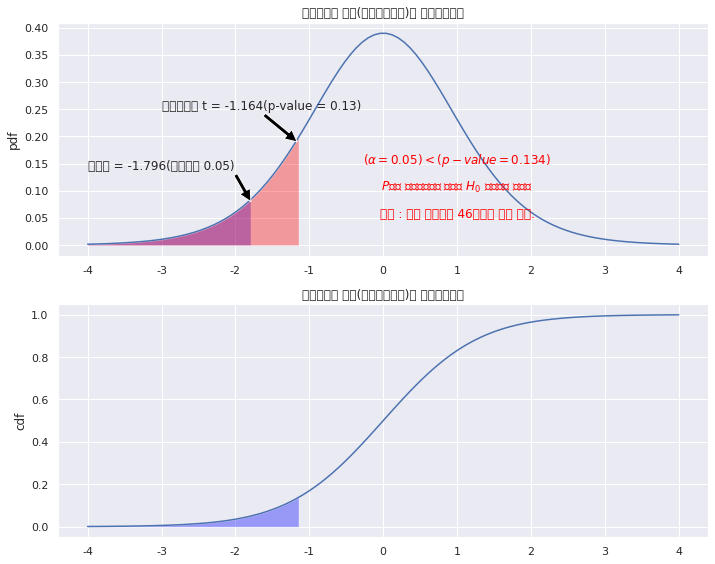

In [ ]:
### 시각화

norm_rv = stats.t(df = 11)

xx = np.linspace(-4, 4, 100)
plt.figure(figsize = (10,8))
plt.subplot(211)
plt.plot(xx, norm_rv.pdf(xx))
plt.ylabel('pdf')
plt.title("검정통계량 분포(표준정규분포)의 확률밀도함수")
black = {"facecolor" : "black"}

# 기각역 text

plt.annotate('기각값 = -1.796(유의수준 0.05)', xy = (-1.79, 0.08), xytext = (-4, 0.14),
             arrowprops = black)

# 기각역 면적

xx2 = np.linspace(-4, -1.796, 100)
plt.fill_between(xx2, norm_rv.pdf(xx2), facecolor = "blue", alpha = 0.35)

# p-value test

plt.annotate('검정통계량 t = -1.164(p-value = 0.13)', xy = (-1.164, 0.19), xytext = (-3, 0.25),
             arrowprops = black)

# p_value 면적

xx3 = np.linspace(-4,-1.146, 100)
plt.fill_between(xx3, norm_rv.pdf(xx3), facecolor = "red", alpha = 0.35)

plt.text(1, 0.15, "$(α = 0.05) < (p-value = 0.134)$",
         horizontalalignment = 'center', color = 'red')

plt.text(1, 0.1, "$P$값이 유의수준보다 크므로 $H_0$ 기각되지 않는다",
         horizontalalignment = 'center', color = 'red')

plt.text(1, 0.05, "결론 : 라면 판매량은 46개보다 적지 않다.",
         horizontalalignment = 'center', color = 'red')

# 누적분포도

plt.subplot(212)
plt.plot(xx, norm_rv.cdf(xx))

plt.fill_between(xx3, norm_rv.cdf(xx3), facecolor = "blue", alpha = 0.35)
plt.ylabel('cdf')
plt.title("검정통계량 분포(표준정규분포)의 누적분포함수")

plt.tight_layout()
plt.show()